<H1> Basic Usage of hubble_contours</H1>

Allows you to take a pre-existing csv file of RA and DEC values and produce contour plots + cropped versions of the raw data as .fits file.

In [1]:
#import things - this tutorial also uses IPython.display, but using matplotlib's imshow() is equally useful
from hubble_contours import ContourProducer

from IPython.display import Image
from astropy.io import fits
import matplotlib.pyplot as plt

Create instance of contour producer. Path is the path to save into (probably your local) and RA_DEC_list is the csv file with RA in the first column, DEC in the second column. We provide a sample list called SDSS-cross-match-with-mag-and-z if you want to play with that. 

In [2]:
my_cp = ContourProducer(path=".", RA_DEC_list="SDSS-cross-match-with-mag-and-z")

Loading coordinates from SDSS-cross-match-with-mag-and-z
Successfully created image and download directories


For the purpose of this tutorial we're only going to look at the very first target on the list. If looking at all targets on the list, skip this step. 

In [3]:
my_cp.coordlist = my_cp.coordlist[:1]
my_cp.coordlist

,RA_1,DEC_1,Z,MI
0,166.484116,3.211986,0.3532,-24.317873


Create all contour .png's and .fits' with the next line. Requires internet connection, as it downloads data products from MAST. Recursively deletes all downloaded files to save space. 

In [4]:
contour_imgs, output_fits = my_cp.make_all_contours()

166.4841156_3.211986065
created directory .\Contour-Images\166.4841156_3.211986065
Completed coordinate 166.4841156, 3.211986065



In [5]:
#path into the file
contour_imgs, output_fits

(['.\\Contour-Images\\166.4841156_3.211986065\\j8zb13010_drz.png'],
 ['.\\Contour-Images\\166.4841156_3.211986065\\j8zb13010_drz.fits'])

There are two ways to show this image - using Image() from IPython.display (which opens the .png file), or using plt.imshow(), which requires you to separately open the .fits file to load in the data

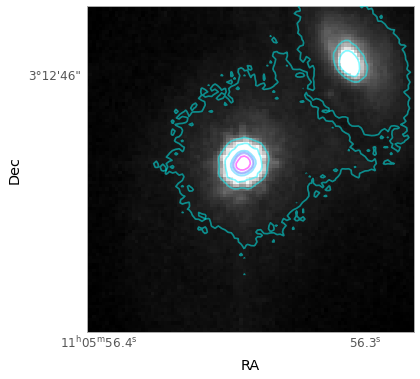

In [6]:
Image(filename=contour_imgs[0])

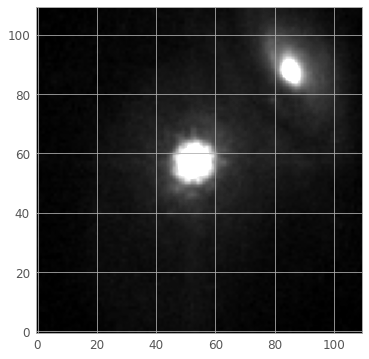

In [12]:
f = fits.open(output_fits[0], memmap=False)
img_data = f[0].data
f.close()
plt.imshow(img_data, origin = "lower", cmap = 'gray',clim=(0,.99))